In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, BatchNormalization, ReLU, GlobalAveragePooling2D, Input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint
import numpy as np
import seaborn as sns
from datetime import datetime
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import sklearn
# os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"
import numpy as np
import matplotlib as mpl
# mpl.use('Agg')
import matplotlib.pyplot as plt
import pandas as pd

TYPE = "Gray_image_InceptionResNetV2"
PATH = os.path.join('/content/drive/MyDrive/Senior Project/Senior V 4 Grayscale/Gray/')
output_dir = '/content/drive/MyDrive/Senior Project/Senior V 4 Grayscale/Gray/Output_InceptionResNetV2/'+TYPE
train_dir = os.path.join(PATH, 'split_train_new_cell_png/')
train_cem_dir = os.path.join(train_dir, 'ce')
train_fib_dir = os.path.join(train_dir, 'fi')
train_oss_dir = os.path.join(train_dir, 'os')

# val_dir = os.path.join(PATH, 'val')
# val_cem_dir = os.path.join(val_dir, 'Cemento')
# val_fib_dir = os.path.join(val_dir, 'Fibrous')
# val_oss_dir = os.path.join(val_dir, 'Ossifying')


BATCH_SIZE = 64
EPOCHS = 200
IMG_HEIGHT = 256
IMG_WIDTH = 256
LEARNING_RATE = 0.001
NUM_CLASS = 3

gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)


train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  train_dir,
  validation_split=0.1,####################แก้
  subset="training",
  seed=1,
  image_size=(IMG_HEIGHT, IMG_WIDTH),
  batch_size=BATCH_SIZE)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  train_dir,
  validation_split=0.1,
  subset="validation",
  seed=1,
  image_size=(IMG_HEIGHT, IMG_WIDTH),
  batch_size=BATCH_SIZE)


for images, labels in val_ds.take(1):
    x_val = images
    y_val = labels
normalization_layer = tf.keras.layers.experimental.preprocessing.Rescaling(1./255)
#augmentation = tf.keras.Sequential([
augment_layer = tf.keras.layers.experimental.preprocessing.RandomFlip(mode='horizontal'), # meaning, left-to-right
augment_layer2 =  tf.keras.layers.experimental.preprocessing.RandomFlip(mode='vertical'), # meaning, top-to-bottom
augment_layer3 =  tf.keras.layers.experimental.preprocessing.RandomWidth(factor=0.05), # horizontal stretch
augment_layer4 =  tf.keras.layers.experimental.preprocessing.RandomRotation(factor=0.05),
#augment_layer5 =  tf.keras.layers.experimental.preprocessing.RandomWidth(factor=0.1), # horizontal stretch
#augment_layer6 =  tf.keras.layers.experimental.preprocessing.RandomRotation(factor=0.1),
augment_layer7 =  tf.keras.layers.experimental.preprocessing.RandomTranslation(height_factor=0.05, width_factor=0.05)


AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)


model = tf.keras.applications.InceptionResNetV2(
    include_top=True,
    input_shape=(IMG_HEIGHT, IMG_WIDTH, 3),
    weights= None,
    classes=NUM_CLASS,
    classifier_activation='softmax'
)
model.compile(
    optimizer='adam',
    loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy'])

if not os.path.exists(output_dir):
    os.makedirs(output_dir)
best_model = ModelCheckpoint(output_dir+'/InceptionResNetV2_Gray_best.h5', save_best_only=True, monitor='val_loss', mode='min')


model.fit(
            train_ds,
            validation_data=val_ds,
            epochs=EPOCHS,
            callbacks=best_model)


Found 2528 files belonging to 3 classes.
Using 2276 files for training.
Found 2528 files belonging to 3 classes.
Using 252 files for validation.
Epoch 1/200
36/36 [==============================] - 119s 694ms/step - loss: 0.7414 - accuracy: 0.7685 - val_loss: 6275.0049 - val_accuracy: 0.2302
Epoch 2/200
36/36 [==============================] - 13s 365ms/step - loss: 0.3388 - accuracy: 0.8664 - val_loss: 85.8185 - val_accuracy: 0.2302
Epoch 3/200
36/36 [==============================] - 13s 361ms/step - loss: 0.3039 - accuracy: 0.8831 - val_loss: 17.3274 - val_accuracy: 0.4841
Epoch 4/200
36/36 [==============================] - 13s 363ms/step - loss: 0.2208 - accuracy: 0.9161 - val_loss: 8.3059 - val_accuracy: 0.2540
Epoch 5/200
36/36 [==============================] - 8s 225ms/step - loss: 0.2017 - accuracy: 0.9178 - val_loss: 9.6187 - val_accuracy: 0.2222
Epoch 6/200
36/36 [==============================] - 16s 437ms/step - loss: 0.1947 - accuracy: 0.9284 - val_loss: 3.6921 - val_acc

### test

In [ ]:
#PATH = os.path.join('./')
#train_dir = os.path.join(PATH, 'train_cell')
#train_cem_dir = os.path.join(train_dir, 'ce')
#train_fib_dir = os.path.join(train_dir, 'fi')
#train_oss_dir = os.path.join(train_dir, 'os')


#TYPE = "Gray_image_inceptionresNetv2"
#PATH = os.path.join('C:\\Users\\CPE\\Desktop\\senior\\gray')
# output_dir = './Output/split_'+TYPE
# train_dir = os.path.join(PATH, 'split_train')
#output_dir = 'C:\\Users\\CPE\\Desktop\\senior\\gray\\InceptionResNetV2\\Output\\'+TYPE
#train_dir = os.path.join(PATH, 'train_cell')
##train_cem_dir = os.path.join(train_dir, 'ce')
#train_fib_dir = os.path.join(train_dir, 'fi')
#train_oss_dir = os.path.join(train_dir, 'os')

#test_dir = os.path.join(PATH, 'test_cell')
#test_cem_dir = os.path.join(test_dir, 'ce')
#test_fib_dir = os.path.join(test_dir, 'fi')
#test_oss_dir = os.path.join(test_dir, 'os')

#num_cem_tr = len(os.listdir(train_cem_dir))
#num_fib_tr = len(os.listdir(train_fib_dir))
#num_oss_tr = len(os.listdir(train_oss_dir))
#print('total Cemento images:', num_cem_tr)
#print('total Fibrous images:', num_fib_tr)
#print('total Ossifying images:', num_oss_tr)

In [ ]:
#test_ds = tf.keras.preprocessing.image_dataset_from_directory(
  #test_dir,
  # validation_split=0.2,
  #subset="validation",
  #seed=123,
  #image_size=(IMG_HEIGHT, IMG_WIDTH),
  #batch_size=BATCH_SIZE)

In [ ]:
#from tensorflow.keras.layers.experimental import preprocessing

#preprocessing.RandomFlip(mode='horizontal'), # meaning, left-to-right
#preprocessing.RandomFlip(mode='vertical'), # meaning, top-to-bottom
#preprocessing.RandomWidth(factor=0.15), # horizontal stretch
#preprocessing.RandomRotation(factor=0.20),
#preprocessing.RandomTranslation(height_factor=0.1, width_factor=0.1),

In [ ]:
#train_data_generator_with_aug = ImageDataGenerator(
 #                                  horizontal_flip=True,
 #                                  vertical_flip = True,
 #                                  width_shift_range = 0.2,
  #                                 height_shift_range = 0.2)

In [ ]:
#val_data_generator_with_aug = ImageDataGenerator()

In [ ]:
#train_ds = train_data_generator_with_aug.flow_from_directory(
 # train_dir,
  #validation_split=0.2,
  # subset="training",
  # seed=123,
#  class_mode='categorical',
#  target_size=(IMG_HEIGHT, IMG_WIDTH),
 # batch_size=BATCH_SIZE)

#val_ds = val_data_generator_with_aug.flow_from_directory(
#  test_dir,
  # validation_split=0.2,
  # subset="validation",
  # seed=123,
#  class_mode='categorical',
 ## target_size=(IMG_HEIGHT, IMG_WIDTH),
 # batch_size=BATCH_SIZE)

In [ ]:
#img_gen = ImageDataGenerator(
#	rescale=1./255,
#	rotation_range=30,
#	horizontal_flip=True)

gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)


train_ds =  tf.keras.preprocessing.image_dataset_from_directory(
  train_dir,
   validation_split=0.2,
   subset="training",
   seed=123,
  image_size =(IMG_HEIGHT, IMG_WIDTH),
  batch_size=BATCH_SIZE)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  test_dir,
   validation_split=0.2,
   subset="validation",
   seed=123,
  image_size=(IMG_HEIGHT, IMG_WIDTH),
  batch_size=BATCH_SIZE)

In [ ]:
#from tensorflow.keras.applications import InceptionResNetV2
#with tf.distribute.MirroredStrategy().scope():
#model = InceptionResNetV2(include_top=False, input_shape=(224, 224, 3))
#for layer in model.layers:
#        layer.trainable = False
#x = Dense(preprocessing.RandomFlip(mode='horizontal'))
#flat1 = Flatten()(model.output)
#output = Dense(3, activation='softmax')(flat1)
#model = Model(inputs=model.inputs, outputs=output)
#model.compile(optimizer='adam',loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True) ,metrics=['accuracy'])


In [ ]:
#from tensorflow.keras import layers

#rescale_layer = tf.keras.Sequential([layers.experimental.preprocessing.Rescaling(1./255)])

#data_augmentation = tf.keras.Sequential([
#    preprocessing.RandomFlip(mode='horizontal'), # meaning, left-to-right

In [ ]:
#BATCH_SIZE = 8
#EPOCHS = 10
#IMG_HEIGHT = 256
#IMG_WIDTH = 256
#LEARNING_RATE = 0.001
#NUM_CLASS = 3

In [ ]:
#gpus = tf.config.experimental.list_physical_devices('GPU')
#for gpu in gpus:
#    tf.config.experimental.set_memory_growth(gpu, True)


#train_ds =  tf.keras.preprocessing.image_dataset_from_directory(
#  train_dir,
#  validation_split=0.1,
#  subset="training",
#  seed=1,
#  image_size =(IMG_HEIGHT, IMG_WIDTH),
#  batch_size=BATCH_SIZE)

#val_ds = tf.keras.preprocessing.image_dataset_from_directory(
#  train_dir,
#  validation_split=0.1,
#  subset="validation",
#  seed=1,
#  image_size=(IMG_HEIGHT, IMG_WIDTH),
#  batch_size=BATCH_SIZE)

In [ ]:
#for images, labels in val_ds.take(1):
#    x_val = images
#    y_val = labels

#normalization_layer = tf.keras.layers.experimental.preprocessing.Rescaling(1./255)
#augmentation = tf.keras.Sequential([
#augment_layer = tf.keras.layers.experimental.preprocessing.RandomFlip(mode='horizontal'), # meaning, left-to-right
#augment_layer2 =  tf.keras.layers.experimental.preprocessing.RandomFlip(mode='vertical'), # meaning, top-to-bottom
#augment_layer3 =  tf.keras.layers.experimental.preprocessing.RandomWidth(factor=0.05), # horizontal stretch
#augment_layer4 =  tf.keras.layers.experimental.preprocessing.RandomRotation(factor=0.05),
#augment_layer5 =  tf.keras.layers.experimental.preprocessing.RandomTranslation(height_factor=0.05, width_factor=0.05)
#AUTOTUNE = tf.data.AUTOTUNE

#train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
#val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
#from tensorflow.keras.applications import InceptionResNetV2
#model = tf.keras.applications.InceptionResNetV2(
#    include_top=True,
#    input_shape=(IMG_HEIGHT, IMG_WIDTH, 3),
#    weights= None,
#    classes=NUM_CLASS,
#    classifier_activation='softmax'
#)
#model.compile(
#    optimizer='adam',
#    loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
#    metrics=['accuracy'])

#if not os.path.exists(output_dir):
#    os.makedirs(output_dir)
#best_model = ModelCheckpoint(output_dir+'/InceptionResnet_Gray_best.h5', save_best_only=True, monitor='val_loss', mode='min')

In [ ]:
#model.summary()

In [ ]:
#model_1 = model.fit(
#  train_ds,
#  validation_data=val_ds,
#  epochs=EPOCHS,
#  callbacks=best_model)


### Matrix

In [ ]:
classes=['Cem','Fis','Oss']
y_pred = model.predict(x_val)
y_pred = tf.argmax(y_pred, axis=1)
con_mat = tf.math.confusion_matrix(labels=y_val, predictions=y_pred).numpy()


1/1 [==============================] - 1s 700ms/step


In [ ]:
#con_mat_norm = np.around(con_mat.astype('float') / con_mat.sum(axis=1)[:, np.newaxis], decimals=2)
con_mat_df = pd.DataFrame(con_mat,
                     index = classes,
                     columns = classes)

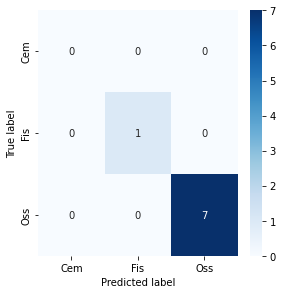

In [ ]:
figure = plt.figure(figsize=(4, 4))
sns.heatmap(con_mat_df, annot=True,cmap=plt.cm.Blues)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
figure.savefig('./output_InceptionResnetV2/CLAHE_image_InceptionResNetV2/cell_confusion_matrix.jpg')